In [18]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 지난 번에 학습했던 모델을 불러오기
model = keras.models.load_model('MNIST_CNN_DATA (1).h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)             

In [25]:
test_num = plt.imread('nustar_five.png')
test_num = test_num[:, :, 0]
#test_num = np.where(test_num > 50, 255, test_num) # 3.jpg 일때 사용
test_num = (test_num > 0.1) * test_num # 3.jpg 이외의 이미지에 사용
# test_num = test_num.astype('float32') / 255 # 3.jpg 일때 사용
test_num = test_num.astype('float32') # 3.jpg 이외의 이미지에 사용
print(test_num)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.11764706
  0.10196079 0.1254902  0.11764706 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.16470589 0.1254902  0.11372549 0.11372549 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.2549019

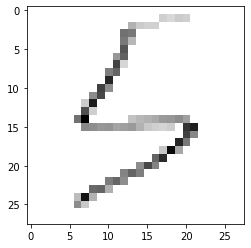

In [26]:
plt.imshow(test_num, cmap="Greys", interpolation='nearest')
test_num = test_num.reshape((1, 28, 28, 1))

plt.show()

In [27]:
print('당신이 쓴 글자는... ', model.predict_classes(test_num), '가 맞습니까?')

당신이 쓴 글자는...  [6] 가 맞습니까?


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
